<a href="https://colab.research.google.com/github/geoffwoollard/prob_prog/blob/main/hw/hw1/prob_prog_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilistic Programming

# Homework 1
* https://www.cs.ubc.ca/~fwood/CS532W-539W/homework/1.html

# Question 1

**Show that the Gamma distribution is conjugate to the Poisson distribution.**

The Gamma distribution is over parameter $x \in (0, \infty)$ and the Poisson distribution is over $k \in [0,1,2,...]$ with parameter $\lambda \in (0, \infty)$. Thus it makes sense to treat Gamma as a prior $p(\lambda)$ over $\lambda=x$ and Poisson as the likelihood $p(k|\lambda)$. In this case the questions is asking for us to show that the posterior $p(k|\lambda)$.

$$
\lambda \sim Gamma[\alpha,\beta] \\
p(\lambda ) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}\exp[-\beta\lambda]
$$

$$
k|\lambda \sim Poisson[\lambda] \\
p(k|\lambda) = \frac{\lambda^k\exp^{-\lambda}}{k!}
$$

We can already see a hint of the conjugacy through the $\lambda$ to some power, and $\lambda$ in $\exp$.

Let's apply Bayes rule.

$$
p(\lambda|k) = \frac{p(k|\lambda)p(\lambda )}{p(k)}
$$

Conjugacy is shown by the posterior being Gamma distributed: $\lambda \sim Gamma[\alpha^\prime,\beta^\prime]$. 

Gamma and Poisson have normalization constants, and the evidence $p(k)$ is unknown (but doesn't depend on $\lambda$ because it's been marginzlized out). However, because the posterior is a distribution over $\lambda$, we can drop all multilicative constants over $k,\alpha,\beta$. If we can show that the posterior has the unnormalized form of the Gamma distribution with some new parameters $\alpha^\prime$ and $\beta^\prime$, which are constant in \lambda, but can contain $k,\alpha,\beta$, then we can use the known form for the normalization constant.

$$
p(\lambda|k) \propto 
\big[ \lambda^{\alpha-1}\exp[-\beta\lambda] \big]
\big[ \lambda^k\exp^{-\lambda} \big]
= \lambda^{(\alpha+k)-1}\exp[-(\beta+1)\lambda]
$$

Thus we see that the Poisson likelihood of $k|\lambda)$ has Gamma as a conjugate prior for $\lambda|\alpha,\beta$, because the Posterior is Gamma distributed with the new parameters $\alpha^\prime = k + \alpha$ and $\beta^\prime = \beta + 1$.

$$
\lambda \sim Gamma[\alpha^\prime,\beta^\prime] \\
p(\lambda ) = \frac{{\beta^\prime}^\alpha}{\Gamma(\alpha^\prime)}\lambda^{\alpha^\prime-1}\exp[-\beta^\prime\lambda]
$$

# Question 2
**Show that the Gibbs transition operator satisfies the detailed balance equation and as such can be interpreted as an MH transition operator that always accepts.**

Let's first clarify what the questions is asking for. In Gibbs there is 
  * the individual update of a component, based on the conditional for that component with the others frozen at what they are
  * the update of all the components after all the components have been updated.

So this questions can be taken in a two senses, and I will answer it as follows.

I will first show that each Gibbs updtae of the one component "satisfies details balance and as such can be interpreted as an MH transition operator that always accepts". Then I will consider what statements we can make on the update of the whole vector (all the components). There's an important subelty there, but the nuances can get quite academic, and I leave off with some important links that further clarify the issue (which I did read and can proudly say I understand).

First, let's consider updating one component of a vector, as we do in Gibbs, and define some notation (following Detailed balance for Gibbs sampling in http://www.gatsby.ucl.ac.uk/teaching/courses/ml1-2015/lect12-handout.pdf). 
  * $T[x,x^*]$ is the transition from vector $x = (x_1,...,x_i,...x_n)$ to $x^* = (x_1,...,x_i^*,...x_n)$, where the ith component of x has been chosen.
  * $\pi_i$ refers to the probability of choosing to update component i. If we randomly chose a components, this would be constant. I'm not sure how to write this down for if we cycled throgh in some fixed order.
  * $p(x_i^*|x_{-i})$ is the conditional probability of updating the component $x_i$ to $x_i^*$ given $x_{-i})$, which is the states of all the components of $x$, but without the ith component.

$$
T[x,x^*] = \pi_ip(x_i^*|x_{-i})
$$

Detailed balance for a step in Gibbs is defined as, where $p(x)$ is the probability of being in state $x$.
$$
T[x^*,x]p(x^*) = T[x,x^*]p(x)
$$

The key step to show detailed balance (in one Gibbs step) is to note that only the ith component changes, and so $x_{-i} = x^*_{-i}$. Then we can just condition write $p(x)$ and $p(x^*)$ to condition on this, respectively, and note they are equal.
$$
T[x,x^*]p(x) \\
= 
\big[\pi_ip(x_i^*|x_{-i})\big]
\big[p(x_i|x_{-i})p(x_{-i}) \big]
\\
= 
\big[\pi_ip(x_i|x{^*}_{-i})\big]
\big[p(x_i|x^*_{-i})p(x^*_{-i}) \big] \ \ \text{swapping} x^*_{-i} \rightarrow x_{-i} 
\\
= \big[\pi_ip(x_i|x^*_{-i})\big]
\big[p(x_i|x{^*}_{-i})p(x^*_{-i}) \big]
\ \ \text{rearanging conditional terms}
\\
= T[x^*,x]p(x^*)
$$

Note that nothing has been assumed about $\pi_i$ here, and thus no matter how we choose to update the ith component (randomly, cycle through), details balane will hold for one Gibbs step.



Showing that details balance hold for a whole Gibbs sweep (where we update all the components) is a different matter. Actually it can be shown for the case when the choice is random, and the Gibbs sampler for one update from $x_t=(x^t_1,...,x^t_n)$ to $x_{t+1} = (x_1^{t+1},...,x_n^{t+1})$ is the average of the Gibbs updates, instead of their product sum. In the latter case, there can be simple counter examples provided that show detail balance does not hold.

See 
  * section 12.4 in https://statweb.stanford.edu/~owen/mc/Ch-MCMC.pdf
  * slide 3 of http://galton.uchicago.edu/~eichler/stat24600/Handouts/s09.pdf



Now that we've established detailed balance, the next aspect of the questions is to show that the MH acceptance operator is always one
$$
A = \min\bigg(1,\frac{p(x^*)g(x|x^*)}{p(x)g(x^*|x)}\bigg)
$$

$p$ is the stationary distribution. We can show that this transition operator satisfies detailed balance:
$$
p(x^*)T[x^*,x] = p(x)T[x,x^*]  \ \ \text{(detailed balance)}
\\
p(x^*)p(x_t|x^*) = p(x_t)p(x^*|x_t)\ \ \text{(T is cond. prob in Gibbs)}
\\
p(x^*,x_t) = p(x_t,x^*)
$$

$q$ is the proposal distribution. In Gibbs, the proposal distribution *is* the stationary distribution, i.e. $p(a|b)=\pi_iq(a|b)$, because the transition operator is the conditional of the stationary distribution (and the probability of choosing to update the ith component).

From detailed balance we have 
$$
\pi_ip(x|x^*) p(x^*) = \pi_ip(x)p(x^*|x)
\\
\implies \frac{p(x^*)g(x|x^*)}{p(x)g(x^*|x)} = 1
$$

And since $p=q$ in Gibbs we have 
$$
A = \min(1,1) = 1
$$

Which means that the MH transition operator in this case always accepts.

# Question 3
**Write code to compute the probability three ways that it is cloudy given that we observe that the grass is wet using this Bayes net model.**

In [ ]:
import numpy as np

In [ ]:
##first define the probability distributions as defined in the excercise:

#define 0 as false, 1 as true
def p_C(c):
    p = np.array([0.5,0.5])
    return p[c]

def p_S_given_C(s,c):
    p = np.array([[0.5,0.9],[0.5,0.1]])
    return p[s,c]
    
def p_R_given_C(r,c):
    p = np.array([[0.8,0.2],[0.2,0.8]])
    return p[r,c]

def p_W_given_S_R(w,s,r):
    p = np.array([
            [[1.0,0.1],[0.1,0.01]],   #w = False
            [[0.0,0.9],[0.9,0.99]],   #w = True
            ])
    return p[w,s,r]

**By enumerating all possible world states and conditioning by counting which proportion are cloudy given the observed world characteristic, namely, that the grass is wet.**

The joint is the enumeration of all possible world states, and the proportion. It is possible to enumerate all these world states because the we can loop through the small number of discrete states (binary in this example) in this small graphical model (just four nodes in this case).

The complexity of enumerating a grapihcal model with $n_{nodes}$ with node i having $n_{states}^i$ number of discrete states is $o(\prod_i n_{states}^i)$. This is how many multiplications there are. Note that we can precompute these states and don't have to keep calling the functions to compute them.

We just need to 
* condition by fixing cloudy as True
* count by taking the ratio of probabilities of the marginals $\frac{p(w=1,c=1)}{p(w=1)} = \frac{\sum_{s,r}p(c=1,s,r,w=1)}{\sum_{c,s,r}p(c,s,r,w=1)}$ from Bayes rule.

Once we have the joint, it is easy to get the marginal by just summing over specific axes.

This gives us an "exact" probability, since it uses the joint, which comes from the conditional probability tables. Other sampling proceduces (MCMC/Gibbs) that use the conditionals will reach in the limit of many random iterations. This is a siple example, and many times the graph has too many nodes, or the nodes have too many states, the the joint is not directly available.

In [ ]:
##1. enumeration and conditioning:
    
## compute joint:
p = np.zeros((2,2,2,2)) #c,s,r,w
for c in range(2):
    p_C_precompouted = p_C(c)
    for s in range(2):
        p_S_given_C_precompouted = p_S_given_C(s,c)
        for r in range(2):
            p_R_given_C_precompouted = p_R_given_C(r,c)
            for w in range(2):
                p[c,s,r,w] = p_C_precompouted*p_S_given_C_precompouted*p_R_given_C_precompouted*p_W_given_S_R(w,s,r)
                
## condition and marginalize:

w=1 # given the grass is wet
c=1 # query 'is it cloudy?'
p_C_given_W = p[c,:,:,w].sum() / p[:,:,:,w].sum() # p(c=1,w=1)/p(w=1)

print('There is a {:.2f}% chance it is cloudy given the grass is wet'.format(p_C_given_W*100))

There is a 57.58% chance it is cloudy given the grass is wet


**Using ancestral sampling and rejection**

We can do ancestral sampling with rejection as follows
1. Start at the root of the graph (node with no parents). 
2. Count the number of cloudy days (prob is proportion of cloudy vs all), while also 
3. rejecting if grass not wet (if the graph continued on we would stop).

We sample both the the R and S nodes inside the loop with C, because they depend on C, but in parallel with each other.

We sample c by setting it to Uni[0,1] > 
equivalent to `np.random.choice([0,1],p=[p_C[0],p_C[1]])`

Here we don't fix wet, so there is a loss of efficiency in so far as the probability of being wet is rare. Quantitatively we reject ~35% of the samples. If it's very rare, then we reject a lot and we have to sample a lot.

We get the probability of cloudy given wet by accumulating the number of wet days and the number of cloudy given wet days. The probability of cloudy given wet, is the number of days that are cloudy given wet (`num_cloudy_given_grass_wet`) divided by the number of wet days (`num_wet`)

In [ ]:
num_rv_to_sample = 4 # C,S,R
num_total_days = 1000000
c_idx, s_idx, r_idx, w_idx = range(num_rv_to_sample)
uni_rv = np.random.uniform(low=0,high=1,size=num_total_days*num_rv_to_sample).reshape(num_total_days,num_rv_to_sample)

num_cloudy_given_grass_wet=0
rejections=0
num_wet = 0
for day in range(num_total_days):
  c = int(uni_rv[day,c_idx] > p_C(0))
  s = int(uni_rv[day,s_idx] > p_S_given_C(0,c))
  r = int(uni_rv[day,r_idx] > p_R_given_C(0,c))
  w = int(uni_rv[day,w_idx] > p_W_given_S_R(0,s,r))
  if w:
    num_wet += 1
    if c: 
      num_cloudy_given_grass_wet += 1
  else:
    rejections += 1
#print('It is cloudy %.1f%% of the time, given it is wet' % ()

print('The chance of it being cloudy given the grass is wet is {:.2f}%'.format(100*num_cloudy_given_grass_wet / num_wet))
print('{:.2f}% of the total samples were rejected'.format(100*rejections/num_total_days))

The chance of it being cloudy given the grass is wet is 57.64%
35.24% of the total samples were rejected


**Using Gibbs sampling**

Since we have the full joint, we can easily get any conditional we want by dividing the joint by the joint marginalized by variable we are conditioning on.

Although the starter code mentions some things about the zero in the conditional probability of p(w|s=0,w=0), this is not an issue in the conditional $p(c|s,r)$ since we marginalize out w:
$$
p(c|s,r) = \frac{p(c,s,r)}{p(s,r)} = \frac{\sum_{w} p(c,s,r,w)}{\sum_{c,w}p(c,s,r,w)}
$$

Doing Gibbs with w=1 means that we always leave it fixed, and thus only spend time doing useful sampling that we won't throw away.

In [ ]:
#3: Gibbs
# we can use the joint above to condition on the variables, to create the needed
# conditional distributions:


#we can calculate p(R|C,S,W) and p(S|C,R,W) from the joint, dividing by the right marginal distribution
#indexing is [c,s,r,w]
p_R_given_C_S_W = p/p.sum(axis=2, keepdims=True) # sum over r to get p(c,s,w)
p_S_given_C_R_W = p/p.sum(axis=1, keepdims=True) # note that the order of indexing remains the same p_S_given_C_R_W[c,s,r,w]


# but for C given R,S,W, there is a 0 in the joint (0/0), arising from p(W|S,R)
# but since p(W|S,R) does not depend on C, we can factor it out:
#p(C | R, S) = p(R,S,C)/(int_C (p(R,S,C)))

#first create p(R,S,C):
p_C_S_R = np.zeros((2,2,2)) #c,s,r
for c in range(2):
    for s in range(2):
        for r in range(2):
            p_C_S_R[c,s,r] = p_C(c)*p_S_given_C(s,c)*p_R_given_C(r,c)
        
#then create the conditional distribution:
p_C_given_S_R_starter_code = p_C_S_R[:,:,:]/p_C_S_R[:,:,:].sum(axis=(0),keepdims=True)
p_C_given_S_R = p.sum(axis=(-1), keepdims=True) / p.sum(axis=(0,-1), keepdims=True)

assert np.allclose(p_C_given_S_R_starter_code,p_C_given_S_R[:,:,:,0])

In [ ]:
p_C_given_S_R.shape

(2, 2, 2, 1)

We run Gibbs for 100 000 samples, and use a burn in of 500, and only take every 10th sample.

At this point I don't know how reasonable these values are, except to compare the final answer with the 57.6% obtained previously.

In [ ]:

##gibbs sampling
num_samples = 1000000
samples = np.zeros(num_samples)
state = np.zeros(4,dtype='int')

num_rv_to_sample=4
uni_rv = np.random.uniform(low=0,high=1,size=num_samples*num_rv_to_sample).reshape(num_samples,num_rv_to_sample)
c_idx, s_idx, r_idx, w_idx = range(num_rv_to_sample)

c,s,r = np.random.choice([0,1],p=[0.5,0.5],size=3)
w=1

for sample in range(num_samples):
  c = int(uni_rv[sample,c_idx] > p_C_given_S_R[0,s,r])
  s = int(uni_rv[sample,s_idx] > p_S_given_C_R_W[c,0,r,w])
  r = int(uni_rv[sample,r_idx] > p_R_given_C_S_W[c,s,0,w])
  samples[sample] = c


The chance of it being cloudy given the grass is wet is 58.26%


In [ ]:
burn_in = 10000
stride = 10
print('The chance of it being cloudy given the grass is wet is {:.2f}%'.format(samples[burn_in::stride].mean()*100))

The chance of it being cloudy given the grass is wet is 57.74%


# Question 4
**Consider the Bayesian linear regression model discussed in the lecture on graphical models**

I will answer the question "backwards" since the results of part c are used in b and b in a.

## c) **produce the analytic form of the posterior predictive.**

The posterior predictive is the probability of $\hat t$ given all the data we know $(\{x_n,t_n\},\sigma^2,\alpha,\hat  x)$. Notice that $w$ is not in there. That is becuase it is unobserved and we only have a distribution for what it is. Compared with typical least squares regression, in this question we don't use a point estimate for it, but the whole probability distribution. This takes some care, because we have a multivariate Gaussian prior on $w$, and we have an updated posterior on $w$ based on our observed data. Integrating over this will involve a multidimensional integral. Let's see how this works.

In the notation below, we drop $\alpha$ and $\sigma$, because they are always given
$$
p(\hat t | \{x_n,t_n\},\hat  x) = \int dw \ p(\hat t | w, \hat x) p(w|\{x_n,t_n\})
$$

The posterior of w is proportional to the posterior of all the $\{t_n\}$ and the prior of $w$ by Bayes rule. The evidence $p(t_n)$ is a constant in $w$ and doesn't affect how we compute the integral over $w$.

$$
p(w|\{x_n,t_n\}) \propto  \Bigg[\prod_n N[t_n|w^Tx_n,\sigma^2]\Bigg] N[w|0,\alpha]
$$

We can furthermore show that the posterior of w is a multivariate Gaussian with mean $w_N = \frac{1}{\sigma^2}V_NX^Tt$ and covariance matrix $V_N = (\frac{X^TX}{\sigma^2} + \frac{I}{\alpha})^{-1}$, where $t \in \mathbb{R}^N$ is the vector of all $t_n \in \mathbb{R}$ and $X \in \mathbb{R}^{n \ x \ d}$ is the data matrix of all $x_n \in \mathbb{R}^d$. To show that this is the case, it suffices to show that argument in the exponent of the posterior of $w$ can be written of the form 
$$
-\frac{1}{2}(w - w_N)^T V_N^{-1} (w - w_N)\\
= -\frac{1}{2}w^TV_N^{-1}w + w_N V_N^{-1}w -\frac{1}{2}w_N^TV_N^{-1}w_N
$$

Neglecting terms that won't affect the integral, and noting that $\sum_n x_nx_n^T = X^TX$ and $\sum_n t_nx_n = X^Tt$, we have 
$$
\log p(w|\{x_n,t_n\}) = -\frac{1}{2\sigma^2} \Sigma_n(t_n-w^Tx_n)^2  -\frac{1}{2}w^T\frac{I}{\alpha}w + ... \\
= -\frac{1}{2}w^T(\frac{X^TX}{\sigma^2} + \frac{I}{\alpha})w + \frac{t^TXw}{\sigma^2} + ...
$$

Completing the square by matching the coefficients in the multidimensional case, we have $V_N^{-1} = \frac{X^TX}{\sigma^2} + \frac{I}{\alpha}$ as desired, and $w_N^TV_N^{-1} = \frac{t^TX}{\sigma^2} \implies w_N = \frac{1}{\sigma^2}V_NX^Tt$ as desired (using the symmetry of $V_N$ and its inverse).

Thus $p(w|\{x_n,t_n\}) = N[w|w_N,V_N]$

To get the posterior in $\hat t$, we have to integrate over w. 
$$
\int \ dw N[\hat t|w^Tx,\sigma^2]N[w|w_N,V_N]
$$

This is of the form of Eq 7.60 in Murphy, 2012, and the integral is another Gaussian in $\hat t$. Doing this integral by completing the square involves resolving the inverse of a matrix. Exact details of this are given in Morphy, 2012 (4.3.4.1 Inverse of a partitioned matrix using Schur complements; 4.3.4.2 The matrix inversion lemma) By Eq. 7.61 in Murphy, 2012, we have

$$
p(\hat t|w,\hat x, \sigma,\{t_n,x_n\}) = N[\hat t|w_N \hat x,\sigma_N^2(\hat x) = \sigma^2+\hat x^TV_N \hat x] 
\\
= \frac{1}{\sqrt{(2\pi\sigma_N^2)}}\exp[\frac{-(\hat t - w_N^T\hat x)^2}{2\sigma_N^2}]
$$

Note that $\hat t$ is centred around the Ridge regression least squares estimate for the weights, but its uncertainty is dependent on its own data point $\hat x$.




## b) **perform pure Gibbs on both w and t̂**

NB: instead of using $w_t$, $w_{t+1}$ (and likewise for $\hat t$), I just use $w$ and $w^*$ with the understanding that $\hat x, x, t, \sigma^2,\alpha$ do not change for MCMC steps.

To answer this question, we need to derive conditional probabilites for $w$ and $\hat t$. This will allow us to update them in Gibbs. For the remaining variables in the graphical model, we have observed them and can use these values.

$$
p(\hat t^* | w,\hat x, x, t, \sigma^2,\alpha)
\\
p(w | \hat t^*,\hat x, x, t, \sigma^2,\alpha) \ 
$$

note the use of the new update for $\hat t$, denoted  $\hat t^*$ in the conditional for $w$

For the conditional of $\hat t$ we can drop $x,t,\alpha$ since $w$ and $\sigma^2$ are given. Then we just have the equation given for $p(t_n|w,x_n,\sigma^2)$ with $t_n \rightarrow \hat t$, and $x_n \rightarrow \hat x$, and $w$ from the latest MCMC step.

$p(\hat t | w,\hat x, x, t, \sigma^2,\alpha) = N[w^T\hat x,\sigma^2]$



For the conditional of w, $\hat t$ does supply some information about it, and it will change depending on that MCMC step we are at. As we cycle through Gibbs, we will use our estimate of it at the appropriate time step, and so we want to know how to use it in the conditinoal of $w$.

We can use the result derived in part c), with the caveat that the $\{t_n,x_n\}_{n=1}^{N+1}$ data now contains the $\{\hat t^*, \hat x\}$ pair, indexed $N+1$, making sure to use the most recent samle of $\hat t^*$ from the last MCMC step.

Thus 
  * $p(w|\{x_n,t_n\},\hat t^*,\hat x,\sigma^2,\alpha) = N[w|w_{N+1},V_{N+1}]$
  * with  $w_{N+1}$ and $V_{N+1}$ as defined in c), but with $X$ and $t$ including $\{\hat t^*, \hat x \}$, and thus changing every MCMC iteration.

## a) **perform MH within Gibbs on the blocks w and t̂**

Doing Metropolis-Hastings within Gibbs means that we use MH to sample from the conditionals. In b, we derived the analysticlal forms, and thus we could use them to sample from. However, if we don't have a nice form, we can use MH. If we further more assume that the proposal q is symmetric, ie $q(x|x^*)=q(x^*|x)$, then the MH acceptance probability is even simpler, but we don't have to assume this to do MH in Gibbs.

$$
A(x^*,x) = \min\big(1, \frac{p(x^*)q(x|x^*)}{p(x)q(x^*|x)}\big)
$$

The probability we are interested in estimating here, p(x) is actually the conditional of $\hat t$ or $w$, so we have two acceptance probabilities with
  * $x = \hat t| w,\hat x, x, t, \sigma^2,\alpha$ 
  * and $x^* = \hat t^*| w,\hat x, x, t, \sigma^2,\alpha$

for estimating $p(\hat t| w,\hat x, x, t, \sigma^2,\alpha)$

and
  * $x = w|\hat t^* ,\hat x, x, t, \sigma^2,\alpha$ 
  * and $x^* = w^*| \hat t^*,\hat x, x, t, \sigma^2,\alpha$

for estimating $p(w| \hat t^*,\hat x, x, t, \sigma^2,\alpha)$

Note that since the conditional is proportional to the joint, up to a normalization constant (the evidence, that cancels out), we can use it in place of the conditional. This is very convenient when getting the evidence is difficult.

$$
\frac{p(x^*)}{p(x)} = \frac{p(\hat t^*| w,\hat x, x, t, \sigma^2,\alpha)}{p(\hat t| w,\hat x, x, t, \sigma^2,\alpha)} = \frac{p(\hat t^*, w,\hat x, x, t, \sigma^2,\alpha)/p(w,\hat x, x, t, \sigma^2,\alpha)}{p(\hat t, w,\hat x, x, t, \sigma^2,\alpha)/p(w,\hat x, x, t, \sigma^2,\alpha)} 
\\
=\frac{p(\hat t^*, w,\hat x, x, t, \sigma^2,\alpha)}{p(\hat t, w,\hat x, x, t, \sigma^2,\alpha)}
$$

The joints facrize nicely, and everything cancels except for the 1D Gaussian of the new data point - even the Gaussian normalization constant cancels

$$
\frac{p(x^*)}{p(x)} = 
\frac
{\exp\frac{-(\hat t^*-w^T\hat x)^2}{2\sigma^2}}
{\exp\frac{-(\hat t-w^T\hat x)^2}{2\sigma^2}}
$$

Likewise, for updating w (taking care to use the new $\hat t^*$ we get

$$
\frac{p(x^*)}{p(x)} 
= \frac{p(\hat t^*, w^*,\hat x, x, t, \sigma^2,\alpha)}{p(\hat t^*, w,\hat x, x, t, \sigma^2,\alpha)}
= \frac{p(\hat t^*| w^*,\hat x, \sigma^2)p(w^*|\alpha)}{p(\hat t^*| w,\hat x, \sigma^2)p(w^*|\alpha)}
\\
\frac
{\exp\frac{-(\hat t^*-{w^{*}}^T\hat x)^2}{2\sigma^2} - \frac{{w^{*}}^Tw^{*}}{2\alpha}}
{\exp\frac{-(\hat t^*-w^T\hat x)^2}{2\sigma^2} - \frac{w^Tw}{2\alpha}}
$$

# Question 5
**Implement a sampler for the LDA model on a corpus consisting of abstracts from NeurIPS in years past. You may wish to start from support code that will be provided on the course website. Use the output to answer questions about the NIPS abstract corpus. The data for this model are in bagofwords_nips.mat, words_nips.mat, and title_nips.mat. When you load these files in the variables DS, WS, WO, and titles will appear in your workspace. The variable WS is the entire corpus vectorized into a long row of words encoded as a row vector of integers. Each integer represents a word, WO is the dictionary; to look up the word corresponding to an integer use WOi. The variable DS is a row vector of the same length as WS that indicates from which document each word comes. If the document number is j then the title of that document can be found using titles[j]. Train LDA with 20 topics using an MCMC sampler in the collapsed representation (i.e. with all βk’s and θd’s integrated out analytically) and use the single sample with the highest joint log likelihood to answer the following questions**

To answer this problem, we need to code up the function for the joint probability, and for sampling.

We use the notation of https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation#Aspects_of_computational_details, except that $\beta$ is written as $\gamma$, following the starter code.

The joint probability p(Z,W) assigns a number to each instantiation of all the words having some assigned topic (Z), and also the identity of each word being what it is (W). Note that in our example, W is fixed and doesn't change, since each word is what it is. However, we can still discuss its probability because of assumptions we make in the model. For instance, having a corpus that is all the same word is less likely that having one with words that are more evenly distributed, because in we are going to use a the same prior parameter $\gamma$ for every word.

Based on the probabilistic graphical model we can write down the joint as factorizing as factorizing into 
* priors over $\alpha$ and $\gamma$ 
* and the conditional probabilities of
  * $Z_{jt}|\theta_j$: (the topic of) word $t$ in document $j$ being a certain topic, given a certain topic distribution vector in document j
  *  $W_{jt}|\phi_{Z_{jt}}$: word $t$ in document $j$ being a certain word, given a certain word distribution vector for topic $Z_{jt}$, i.e. $\phi_{Z_{jt}}$ is a distribution over the whole corpus, for topic $Z_{jt}$, over words

Since the we commit to a Dirichlet distribution for $\theta,\phi$ in the model, we can integrate them out of the joint, and this is tractable analytically.

Because of the graph (conditional probability of $Z_{jt}$ are dependent on $\theta_j$ and not $\phi_{Z_{jt}}$; and likewise $W_{jt}$ not dependent on $\theta_j$), these integrals split up nicely into a piece over $\theta$ and another over $\phi$. 

Considering the sub-piece of $\theta_j$ for document $j$ we have
$$
\int_{\theta_j} d\theta_j \ p(\theta_j ; \alpha) \prod_{t=1}^{N_j} p(Z_{jt}|\theta_j) 
\\
= \int_{\theta_j} \frac{\Gamma(\sum_i^K \alpha_i)}{\prod_i^K\Gamma(\alpha_i)}\prod\theta_{ji}^{\alpha_i-1}\prod_t^{N_j}p(Z_{jt}|\theta_j)
$$

A key step in occurs here, where we relate this probability to the counts of words and topics, which we have on hand and can conveniently store and update. The key step is to swap the product sum over the words $t$ in document $j$ with a product sum over topics $i$ of the counts of all words belonging top topic i in document j, denoted by $n_{j*}^i$. The counts in the exponents of $\theta_j$ of the categorical distribution of $Z$ sum up, and can now be combined with the $\alpha_i-1$ in the exponent from the prior. The functional form is Dirichlet, with parameter $n_{j*}^i + \alpha_i$ with no mixing between $\theta_j$s, and we know what the integral evaluates to because we know the normalization constant for the Dirichlet distribution. The outer product sum over all the documents gives us the whole theta piece as

$$
\prod_j^M 
\frac{\Gamma(\sum_i^K \alpha_i)}{\prod_i^K\Gamma(\alpha_i)} 
\frac{\prod_i^K\Gamma(n_{j*}^i + \alpha_i)}{\Gamma(\sum_i^K n_{j*}^i + \alpha_i)}
$$

A similar argument holds for $\phi,\gamma$ piece, the sum happening over the same words in all documents, $n_{*r}^i$
  * $\theta_j \rightarrow \phi_i$
  * $\alpha_i \rightarrow \gamma_r$
  * $n_{j*}^i \rightarrow n_{*r}^i$
  * $\prod_j^M \rightarrow \prod_i^K$
  * $\sum_i^K / \prod_i^K \rightarrow \sum_r^V  / \prod_r^V$

And thus the joint with $\theta,\phi$ analytically integrated out is

$$
p(Z,W;\alpha,\gamma) = 
\prod_j^M 
\frac{\Gamma(\sum_i^K \alpha_i)}{\prod_i^K\Gamma(\alpha_i)} 
\frac{\prod_i^K\Gamma(n_{j*}^i + \alpha_i)}{\Gamma(\sum_i^K n_{j*}^i + \alpha_i)}
\prod_i^K
\frac{\Gamma(\sum_r^V \gamma_r)}{\prod_r^V\Gamma(\gamma_r)} 
\frac{\prod_r^V\Gamma(n_{*r}^i + \gamma_r)}{\Gamma(\sum_r^V n_{*r}^i + \beta_r)}
$$

Furthermore, if we assume the $\alpha$s and $\gamma$s are the same for all topics and words, respectively, then we can factor them out of the sums. When we take the log of this, the product sums become products. These are very large numbers and we get overlow at $\Gamma(\geq 173)$. However the $\log$ of this would be much smaller, and a $log \Gamma$ function is implemented in `scipy.special.loggamma` that allows us to avoid numerical overflow.

In [ ]:
import numpy as np
import scipy.io
import scipy.special
import pandas as pd


In [ ]:
!wget https://www.cs.ubc.ca/~fwood/CS532W-539W/homeworks/data/bagofwords_nips.mat
!wget https://www.cs.ubc.ca/~fwood/CS532W-539W/homeworks/data/words_nips.mat
!wget https://www.cs.ubc.ca/~fwood/CS532W-539W/homeworks/data/titles_nips.mat

In [ ]:
bagofwords = scipy.io.loadmat('bagofwords_nips.mat')
words_d = scipy.io.loadmat('words_nips.mat')
titles = scipy.io.loadmat('titles_nips.mat')

In [ ]:
titles['titles'].shape

In [ ]:
bagofwords['WS'].shape # The variable WS is the entire corpus vectorized into a long row of words encoded as a row vector of integers.

In [ ]:
t = 2301375-1 # there are N=2301375 number of total words in all documents 
bagofwords['WS'][0,t] # these are the integer keys of each word, that can be used to look up the string word in words['WO']

In [ ]:
np.max(bagofwords['DS']), bagofwords['DS'].shape # The variable DS is a row vector of the same length as WS that indicates from which document each word comes. 


In [ ]:
i=13649-1 # there are 13649 different words
len(words_d['WO']), words_d['WO'][i] # Each integer represents a word, WO is the dictionary; to look up the word corresponding to an integer use WOi.

In [ ]:
words_d['WO']

In [ ]:
j=1740-1 # there are M=1740 documents
titles['titles'].shape,titles['titles'][j] # If the document number is j then the title of that document can be found using titles[j]

Train LDA with 20 topics using an MCMC sampler in the collapsed representation (i.e. with all βk’s and θd’s integrated out analytically) and use the single sample with the highest joint log likelihood to answer the following questions :

  * What are the top ten most probable words for each of the 20 topics?
  * One can consider the distribution over topics as a low dimensional representation of a document. We can use the dot product between topic distributions for two documents as a similarity metric. What are the ten most similar documents to the first document, “Connectivity Versus Entropy”?


In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

# from joint_log_lik import joint_log_lik
# from sample_topic_assignment import sample_topic_assignment

bagofwords = loadmat('bagofwords_nips.mat')
WS = bagofwords['WS'][0] - 1  #go to 0 indexed
DS = bagofwords['DS'][0] - 1

WO = loadmat('words_nips.mat')['WO'][:,0]
titles = loadmat('titles_nips.mat')['titles'][:,0]

#This script outlines how you might create a MCMC sampler for the LDA model

alphabet_size = WO.size

document_assignment = DS
words = WS

In [ ]:
document_assignment.shape

(2301375,)

In [ ]:
#subset data, EDIT THIS PART ONCE YOU ARE CONFIDENT THE MODEL IS WORKING
#PROPERLY IN ORDER TO USE THE ENTIRE DATA SET
n_docs = np.unique(document_assignment).size
idx_subset = document_assignment < n_docs # subste of 100 documents
words = words[idx_subset]
document_assignment  = document_assignment[idx_subset]

assert np.isclose(n_docs, document_assignment.max() + 1)

#number of topics
n_topics = 20

#initial topic assigments
np.random.seed(10)
topic_assignment = np.random.randint(n_topics, size=document_assignment.size) # integer topic assignment of 149771 words

#within document count of topics
doc_counts = np.zeros((n_docs,n_topics))

In [ ]:
for d in range(n_docs):
    #histogram counts the number of occurences in a certain defined bin
    # documents x topics. un-normalized theta
    doc_counts[d] = np.histogram(topic_assignment[document_assignment == d], bins=n_topics, range=(-0.5,n_topics-0.5))[0]

In [ ]:
#doc_N: array of size n_docs count of total words in each document, minus 1
doc_N = doc_counts.sum(axis=1) - 1

#within topic count of words
# topics x words
topic_counts = np.zeros((n_topics,alphabet_size))
for k in range(n_topics):
    w_k = words[topic_assignment == k]
    topic_counts[k] = np.histogram(w_k, bins=alphabet_size, range=(-0.5,alphabet_size-0.5))[0]

#topic_N: array of size n_topics count of total words assigned to each topic
topic_N = topic_counts.sum(axis=1)

See comments in `joint_log_lik` function

In [ ]:
def joint_log_lik(doc_counts, topic_counts, alpha, gamma):
    """
    Calculate the joint log likelihood of the model
    
    Args:
        doc_counts: n_docs x n_topics array of counts per document of unique topics
        topic_counts: n_topics x alphabet_size array of counts per topic of unique words
        alpha: prior dirichlet parameter on document specific distributions over topics
        gamma: prior dirichlet parameter on topic specific distribuitons over words.
    Returns:
        ll: the joint log likelihood of the model
    """

    # note that scipy.special.gamma goes until 171, 172 is infinity, so use loggamma instead
    # see https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation#Aspects_of_computational_details
      # in particular, the joint p(zw) with theta, phi marginalized out
      # https://wikimedia.org/api/rest_v1/media/math/render/svg/fddec8ee49ae29b995974494e5cf11fe5709bafb
    theta = doc_counts # (100, 20) (M,K) doc_counts[m,k] is number of times document m uses topic k
    phi = topic_counts # (20, 13649) (K,V) topic_counts[k,v] is number of times topic k uses word v
    
    K = n_topics
    M = n_docs
    K,V = phi.shape
    M,K_ = theta.shape
    assert K == K_

    # numerator theta / alpha
    #loggamma_sum_alpha = M*scipy.special.loggamma(K*alpha) # constant can drop
    n_alpha = doc_counts + alpha # n^{i}_{j,(\cdot)}
    loggamma_n_alpha = (scipy.special.loggamma(n_alpha)).sum()
    # denomenator theta / alpha
    #loggamma_alpha = M*K*scipy.special.loggamma(alpha)
    loggamma_sum_n_alpha = scipy.special.loggamma(n_alpha.sum(1)).sum()

    # numerator phi / gamma
    #loggamma_sum_gamma = K*scipy.special.loggamma(V*gamma)
    n_gamma = topic_counts + gamma # n^{i}_{(\cdot),r}
    loggamma_n_gamma = (scipy.special.loggamma(n_gamma)).sum()
    # denomenator phi / gamma
    #loggamma_gamma = K*V*scipy.special.loggamma(gamma)
    loggamma_sum_n_gamma = scipy.special.loggamma(n_gamma.sum(1)).sum()

    ll =  + loggamma_n_alpha - loggamma_sum_n_alpha \
    + loggamma_n_gamma  - loggamma_sum_n_gamma

    return ll

%time joint_log_lik(doc_counts, topic_counts, alpha=0.1, gamma=0.001)


CPU times: user 15.9 ms, sys: 0 ns, total: 15.9 ms
Wall time: 18.6 ms


-24586180.790821318

In [ ]:
def sample_topic_assignment(topic_assignment,
                            topic_counts,
                            doc_counts,
                            topic_N,
                            doc_N,
                            alpha,
                            gamma,
                            words,
                            document_assignment,
                            sampled_word_idx,
                            topic_integers,
                            n_topics,
                            alphabet_size):
    """
    Sample the topic assignment for each word in the corpus, one at a time.
    
    Args:
        topic_assignment: size n array of topic assignments
        topic_counts: n_topics x alphabet_size array of counts per topic of unique words        
        doc_counts: n_docs x n_topics array of counts per document of unique topics

        topic_N: array of size n_topics count of total words assigned to each topic
        doc_N: array of size n_docs count of total words in each document, minus 1
        
        alpha: prior dirichlet parameter on document specific distributions over topics
        gamma: prior dirichlet parameter on topic specific distribuitons over words.

        words: size n array of wors
        document_assignment: size n array of assignments of words to documents
    Returns:
        topic_assignment: updated topic_assignment array
        topic_counts: updated topic counts array
        doc_counts: updated doc_counts array
        topic_N: updated count of words assigned to each topic
    """
    # sampled_word_idx = 0
    document_idx = document_assignment[sampled_word_idx]
    word_idx = words[sampled_word_idx]
    old_topic_idx = topic_assignment[sampled_word_idx]
    
    # remove sampled from counts
    # TODO check how sparse and if sparse encoding helps
    topic_counts[old_topic_idx,word_idx] -= 1
    doc_counts[document_idx,old_topic_idx] -= 1
    topic_N[old_topic_idx] -= 1

    # using notation from
    # https://medium.com/analytics-vidhya/topic-modeling-using-lda-and-gibbs-sampling-explained-49d49b3d1045
    # n = doc_counts
    # v = topic_counts
    # lam = gamma
    # z = topic_assignment
    # n_alpha = n+alpha
    # v_lam = v+lam

    # unvectorized
    # p = (n_alpha[document_idx,k])*(v_lam[k,w]) / (n_alpha[document_idx].sum()*v_lam[k].sum()) 
    # vectorize over k
    # p = n_alpha[document_idx]*v_lam[:,word_idx] / (n_alpha[document_idx].sum()*v_lam.sum(1))

    # Eq 27.37 in p. 956 of Murphy, 2012
    K = n_topics
    V = alphabet_size
    c_vk = topic_counts
    c_ik = doc_counts
    c_k = topic_N
    L_i = doc_N

    p = (c_ik[document_idx] + alpha)*(c_vk[:,word_idx] + gamma) / ((c_k + V*gamma)*(L_i[document_idx]+K*alpha))
    
    z_sampled = np.random.choice(topic_integers,size=1,p=p/p.sum())
    new_topic_idx = z_sampled

    # update
    topic_counts[new_topic_idx,word_idx] += 1
    doc_counts[document_idx,new_topic_idx] += 1
    topic_assignment[sampled_word_idx] = new_topic_idx
    #topic_N = topic_counts.sum(axis=1) 
    topic_N[new_topic_idx] += 1
    

    return topic_assignment, topic_counts, doc_counts, topic_N

In [ ]:
#prior parameters, alpha parameterizes the dirichlet to regularize the
#document specific distributions over topics and gamma parameterizes the 
#dirichlet to regularize the topic specific distributions over words.
#These parameters are both scalars and really we use alpha * ones() to
#parameterize each dirichlet distribution. Iters will set the number of
#times your sampler will iterate.
alpha = 0.1
gamma = 0.001 
iters = 150

jll = []

ll_max = joint_log_lik(doc_counts,topic_counts,alpha,gamma)
jll.append(ll_max)

n_words = words.size
topic_integers = np.arange(20)
iter_li = []
    
K = n_topics
M = n_docs
K,V = topic_counts.shape # (20, 13649) (K,V) topic_counts[k,v] is number of times topic k uses word v
M,K_ = doc_counts.shape # (100, 20) (M,K) doc_counts[m,k] is number of times document m uses topic k
assert K == K_

In [ ]:
%%timeit 
sampled_word_idx=0
sample_topic_assignment(
                        topic_assignment,
                        topic_counts,
                        doc_counts,
                        topic_N,
                        doc_N,
                        alpha,
                        gamma,
                        words,
                        document_assignment,
                        sampled_word_idx,
                        topic_integers,
                        K,
                        V)

The slowest run took 10.13 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 72.4 µs per loop


In [ ]:
for iter in range(iters):
  #print('iteration',iter)
  sampled_word_idxs = np.random.permutation(words.size)
  for i,sampled_word_idx in enumerate(sampled_word_idxs):
    if (i % (n_words//10)) == 0: print(i)
    # prm = np.random.permutation(words.shape[0])
    # words = words[prm]   
    # document_assignment = document_assignment[prm]
    # topic_assignment = topic_assignment[prm]

    #sampled_word_idx = np.random.choice(n_words)
    
    topic_assignment, topic_counts, doc_counts, topic_N = sample_topic_assignment(
                                topic_assignment,
                                topic_counts,
                                doc_counts,
                                topic_N,
                                doc_N,
                                alpha,
                                gamma,
                                words,
                                document_assignment,
                                sampled_word_idx,
                                topic_integers,
                                K,
                                V)
    if (i % (n_words//1000)) == 0:
      #print(i,end=' ')
      ll = joint_log_lik(doc_counts,topic_counts,alpha,gamma)
      jll.append(ll)
      iter_li.append(iter)
  ll = joint_log_lik(doc_counts,topic_counts,alpha,gamma)
  jll.append(ll)
  iter_li.append(iter)
  if ll > ll_max:
    ll_max = ll
    topic_counts_max = topic_counts
plt.plot(jll)

Text(0.5, 1.0, 'Joint distribution')

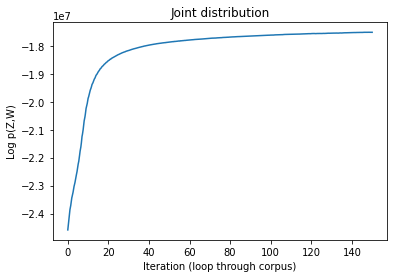

In [60]:
sr = pd.Series(jll)
sr.index = np.linspace(0,np.max(iter_li),len(jll))
sr.plot()
plt.ylabel('Log p(Z,W)')
plt.xlabel('Iteration (loop through corpus)')
plt.title('Joint distribution')

Text(0.5, 1.0, 'Joint distribution (at end of run showing equilibrium)\n')

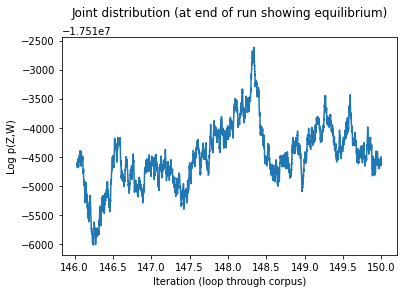

In [69]:
sr = pd.Series(jll)
sr.index = np.linspace(0,np.max(iter_li),len(jll))
sr.iloc[-4000:].plot()
plt.ylabel('Log p(Z,W)')
plt.xlabel('Iteration (loop through corpus)')
plt.title('Joint distribution (at end of run showing equilibrium)\n')

In [ ]:
import pickle
wdir = '/content/drive/MyDrive/ubc_cs/2021w/cpsc532w'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import time
fname = ('').join([wdir,'/hw1-q5-',time.strftime('%Y%m%d-%H%M'),'.p'])

data_d = {'topic_assignment':topic_assignment,
          'topic_counts':topic_counts, 
          'doc_counts':doc_counts,
          'topic_N':topic_N,
          'alpha':alpha,
          'gamma':gamma,
          'n_topics':n_topics,
          'alphabet_size':alphabet_size,
          'n_words':n_words,
          'll_max':ll_max,
          'n_docs':n_docs,
          'jll':jll,
          'iter':iter_li,
}

pickle.dump( data_d, open( fname, "wb" ) )

In [75]:
!ls /content/drive/MyDrive/ubc_cs/2021w/cpsc532w

hw1-q5-20210928-1708.p	hw1-q5-20210930-1940.p	hw1-q5-20211001-0233.p
hw1-q5-20210929-0530.p	hw1-q5-20210930-2348.p	hw1-q5-20211001-0525.p


In [ ]:
# fname_load = '/content/drive/MyDrive/ubc_cs/2021w/cpsc532w/hw1-q5-20210929-0530.p'
# load_d = pickle.load( open( fname_load, "rb" ) )

# alpha = load_d['alpha']
# topic_assignment=load_d['topic_assignment']
# topic_counts=load_d['topic_counts']
# doc_counts=load_d['doc_counts']
# topic_N=load_d['topic_N']
# alpha=load_d['alpha']
# gamma=load_d['gamma']
# n_topics=load_d['n_topics']
# alphabet_size=load_d['alphabet_size']
# n_words=load_d['n_words']
# ll_max=load_d['ll_max']
# n_docs =load_d['n_docs']
# jll=load_d['jll']

## **What are the top ten most probable words for each of the 20 topics?**

In [70]:
### find the 10 most probable words of the 20 topics:
ind = np.argsort(topic_counts_max, axis=1) # note that this is from lest to most probable, and we should look at the end of the array for the popular

In [71]:
n_prob_words = 10
most_popular_words = words_d['WO'][ind[:,-n_prob_words:].flatten()].reshape(n_topics,n_prob_words)
print('most popular words')
for row in range(most_popular_words.shape[0]):
  print('topic %i'%row,end=" ")
  for col in range(most_popular_words.shape[1]):
    print(most_popular_words[row,col][0],end=" ")
  print()

most popular words
topic 0 face pixel objects figure feature features recognition object images image 
topic 1 linear distribution mixture space matrix models algorithm gaussian model data 
topic 2 fixed model recurrent states neural phase dynamics system state time 
topic 3 function functions probability class bound error size examples set number 
topic 4 analysis order frequency filter processing signals time noise information signal 
topic 5 connectionist graph level representations rule representation set tree rules structure 
topic 6 vector classifier error class test performance classification data set training 
topic 7 direction eye cells orientation cortex response stimulus motion model visual 
topic 8 approximation matrix gradient case problem functions algorithm vector linear function 
topic 9 vlsi input neuron voltage output current figure chip circuit analog 
topic 10 number output net nodes layer memory input networks neural network 
topic 11 neural log variables prior bay

**One can consider the distribution over topics as a low dimensional representation of a document. We can use the dot product between topic distributions for two documents as a similarity metric. 

## **What are the ten most similar documents to the first document, “Connectivity Versus Entropy”?**

* Normalize counts to distribution (sum to 1). Use cosine similarity to handle confounding length/size.

In [72]:
query_idx = 0
topics_dist = doc_counts/doc_counts.sum(1).reshape(-1,1)
def norm(arr,axis=None): 
  if axis is None:
    return np.sqrt((arr*arr).sum())
  else:
    return np.sqrt((arr*arr).sum(axis))
similarity = topics_dist.dot(topics_dist[query_idx,:]) / (norm(topics_dist,1) * norm(topics_dist[query_idx,:]))

In [73]:
n_sim=10
similar_idx = np.argsort(similarity)[-n_sim:][::-1]
for idx, close_topic in enumerate([x[0] for x in titles[similar_idx]]):
  print(idx,close_topic)

0 Connectivity Versus Entropy 
1 LEARNING STOCHASTIC PERCEPTRONS UNDER K-BLOCKING DISTRIBUTIONS 
2 A Method for Learning from Hints 
3 The Devil and the Network . 
4 Strong Unimodality and Exact Learning of Constant Depth g-Perceptron Networks 
5 On Neural Networks with Minimal Weights 
6 Estimating Average-Case Learning Curves Using Bayesian, Statistical Physics and VC Dimension Methods 
7 The VC-Dimension versus the Statistical Capacity of Multilayer Networks 
8 The Perceptron Algorithm Is Fast for Non-Malicious Distributions 
9 Neural Computing with Small Weights 
